In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#default styles for plots for better readability
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")


In [2]:
 df = pd.read_csv('titanic3.csv')
 df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [3]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [5]:
# Check for the total number of missing values in each column.
print("\nMissing values per column before cleaning:")
print(df.isnull().sum())


Missing values per column before cleaning:
pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64


In [6]:
# Handling Missing Values

# Age: This column has a significant number of missing values.
#  A good strategy is to fill them with the median age, which is robust to outliers.
median_age = df['age'].median()
df['age'].fillna(median_age, inplace=True)
print(f"\nMissing 'age' values filled with median age: {median_age}")


Missing 'age' values filled with median age: 28.0


/tmp/ipython-input-3972129042.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(median_age, inplace=True)


In [7]:
# Embarked: This column has very few missing values.
# We can fill them with the mode (the most frequent value).
mode_embarked = df['embarked'].mode()[0]
df['embarked'].fillna(mode_embarked, inplace=True)
print(f"Missing 'embarked' values filled with mode: '{mode_embarked}'")

Missing 'embarked' values filled with mode: 'S'


/tmp/ipython-input-3953581110.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(mode_embarked, inplace=True)


In [8]:
df['fare'].fillna(df['fare'].median(), inplace=True)

/tmp/ipython-input-4242156193.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fare'].fillna(df['fare'].median(), inplace=True)


In [9]:
# Cabin: This column has too many missing values to fill meaningfully.
# Instead, we will create a new feature that simply indicates whether a
# passenger had a cabin or not. This might be a useful predictor.
df['has_cabin'] = df['cabin'].notnull()

In [10]:
# Now we drop the original 'cabin' column, and other columns we don't need.
df.drop(['cabin', 'name', 'ticket', 'boat', 'body', 'home.dest'], axis=1, inplace=True)
print("Engineered 'has_cabin' feature and dropped unnecessary columns.")

Engineered 'has_cabin' feature and dropped unnecessary columns.


In [15]:
# Fill remaining missing values with 0 for columns that will be converted to int
df[['pclass', 'survived', 'sibsp', 'parch']] = df[['pclass', 'survived', 'sibsp', 'parch']].fillna(0)
# Ensure correct data types
df['pclass'] = df['pclass'].astype(int)
df['survived'] = df['survived'].astype(int)
df['sibsp'] = df['sibsp'].astype(int)
df['parch'] = df['parch'].astype(int)

In [16]:
# Verify that the missing values have been handled
print("\nMissing values per column after cleaning:")
print(df.isnull().sum())


Missing values per column after cleaning:
pclass       0
survived     0
sex          1
age          0
sibsp        0
parch        0
fare         0
embarked     0
has_cabin    0
dtype: int64


In [12]:
df.shape

(1310, 9)

In [18]:
# STEP 3: GENERATING SUMMARY STATISTICS AND GROUP-BASED INSIGHT
print("\n Generating Insights")

#summary statistics for the numerical columns.
print("\nSummary statistics for numerical columns:")
print(df.describe())


 Generating Insights

Summary statistics for numerical columns:
            pclass     survived          age        sibsp        parch  \
count  1310.000000  1310.000000  1310.000000  1310.000000  1310.000000   
mean      2.293130     0.381679    29.502036     0.498473     0.384733   
std       0.839913     0.485984    12.900383     1.041352     0.865295   
min       0.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    22.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    35.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare  
count  1310.000000  
mean     33.266714  
std      51.724348  
min       0.000000  
25%       7.895800  
50%      14.454200  
75%      31.275000  
max     512.329200  


In [20]:

# Group-based Insights
#  Survival Rate by Gender
survival_by_sex = df.groupby('sex')['survived'].mean()
print("\nSurvival Rate by Gender:")
print(survival_by_sex)


Survival Rate by Gender:
sex
female    0.727468
male      0.190985
Name: survived, dtype: float64


In [21]:
# Survival Rate by Passenger Class
survival_by_pclass = df.groupby('pclass')['survived'].mean()
print("\nSurvival Rate by Passenger Class:")
print(survival_by_pclass)


Survival Rate by Passenger Class:
pclass
0    0.000000
1    0.619195
2    0.429603
3    0.255289
Name: survived, dtype: float64


In [22]:

# Survival Rate by Port of Embarkation
survival_by_embarked = df.groupby('embarked')['survived'].mean()
print("\nSurvival Rate by Port of Embarkation:")
print(survival_by_embarked)


Survival Rate by Port of Embarkation:
embarked
C    0.555556
Q    0.357724
S    0.333697
Name: survived, dtype: float64


In [23]:
#Survival rate by sex and passenger class
print("\nSurvival rate by sex and passenger class:")
print(df.groupby(['sex', 'pclass'])['survived'].mean())


Survival rate by sex and passenger class:
sex     pclass
female  1         0.965278
        2         0.886792
        3         0.490741
male    1         0.340782
        2         0.146199
        3         0.152130
Name: survived, dtype: float64


In [28]:
# Survival Rate by Age
survival_by_age = df.groupby('age')['survived'].mean()
print("\nSurvival Rate by Age:")
print(survival_by_age)


Survival Rate by Age:
age
0.1667     1.000000
0.3333     0.000000
0.4167     1.000000
0.6667     1.000000
0.7500     0.666667
             ...   
70.5000    0.000000
71.0000    0.000000
74.0000    0.000000
76.0000    1.000000
80.0000    1.000000
Name: survived, Length: 98, dtype: float64



Visualizing Data
Generating and displaying plots


/tmp/ipython-input-2810986280.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='survived', data=df, palette='viridis')


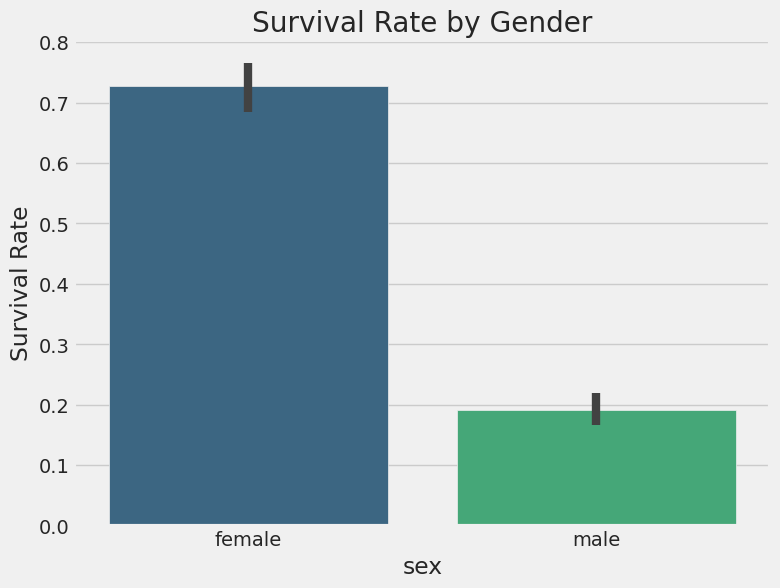

In [24]:
# STEP 4: VISUALIZING KEY PATTERNS AND CORRELATIONS
print("\nVisualizing Data")
print("Generating and displaying plots")

# Survival Rate by Gender
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='survived', data=df, palette='viridis')
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()


/tmp/ipython-input-1933621844.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pclass', y='survived', data=df, palette='plasma')


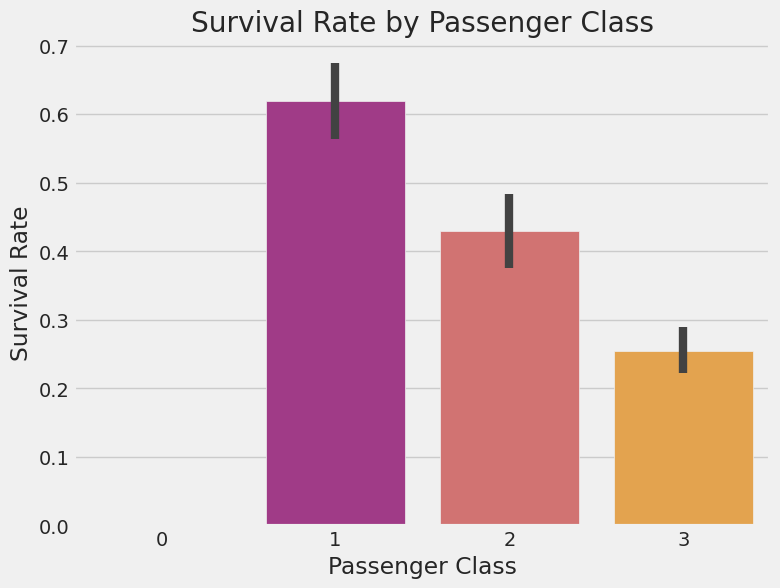

In [25]:
# Survival Rate by Passenger Class
plt.figure(figsize=(8, 6))
sns.barplot(x='pclass', y='survived', data=df, palette='plasma')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

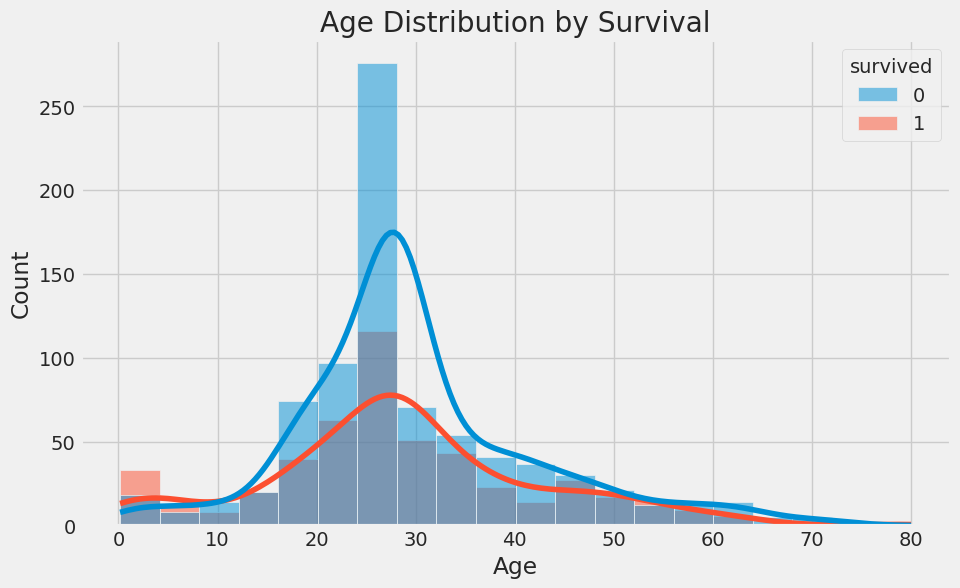

In [ ]:
# Age distribution by survival
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='survived', bins=20, kde=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('age_distribution.png')
plt.show()

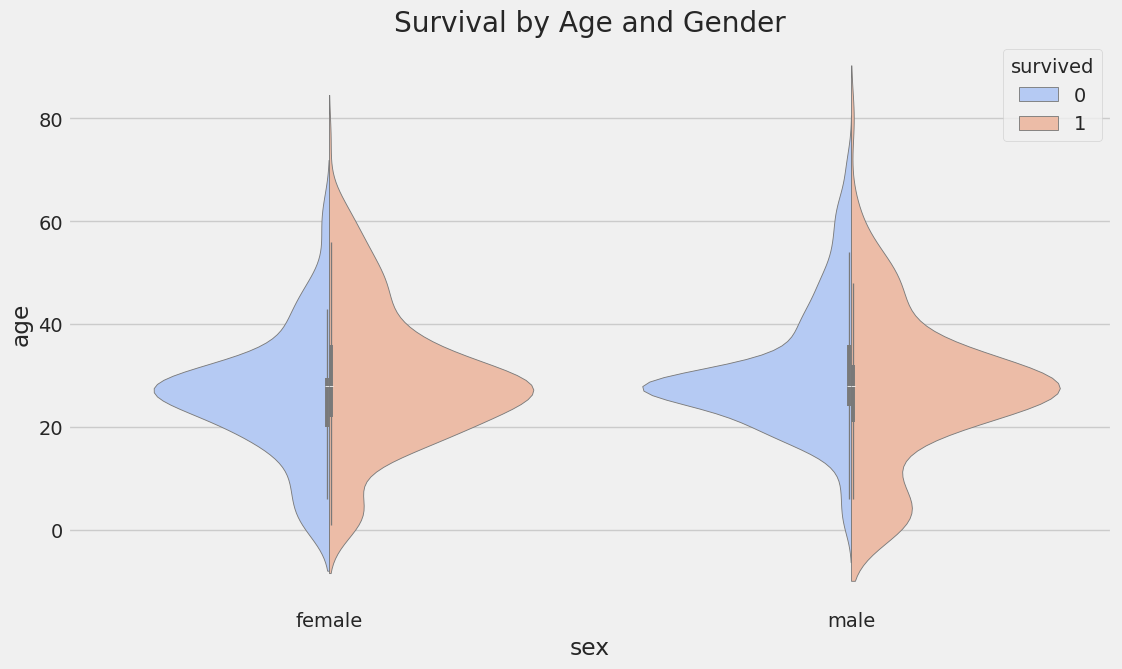

In [29]:
# Survival Rate by Age and Sex
plt.figure(figsize=(12, 7))
sns.violinplot(x='sex', y='age', hue='survived', data=df, split=True, palette='coolwarm')
plt.title('Survival by Age and Gender')
plt.show()

<Figure size 1000x600 with 0 Axes>

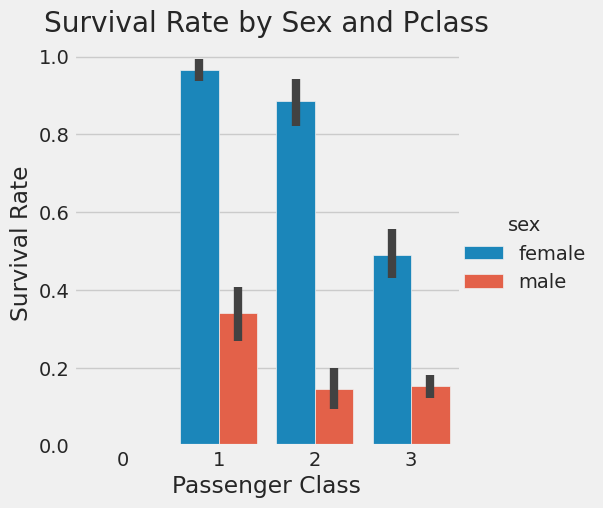

In [30]:
# Survival rate by Sex and Pclass
plt.figure(figsize=(10, 6))
sns.catplot(x='pclass', y='survived', hue='sex', kind='bar', data=df)
plt.title('Survival Rate by Sex and Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.savefig('survival_by_sex_pclass.png')
plt.show()

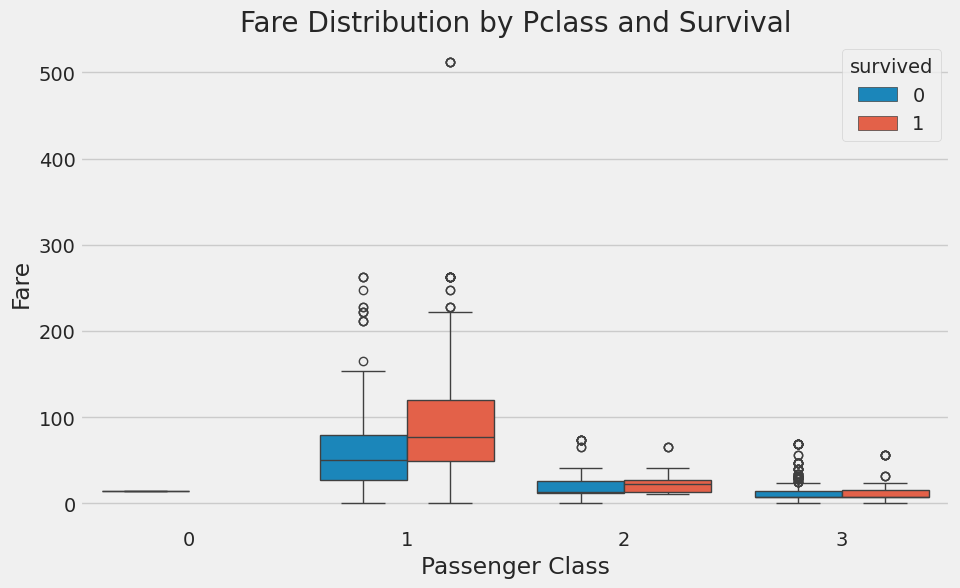

In [31]:
# Fare distribution by Pclass and Survival
plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='fare', hue='survived', data=df)
plt.title('Fare Distribution by Pclass and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.savefig('fare_by_pclass_survival.png')
plt.show()

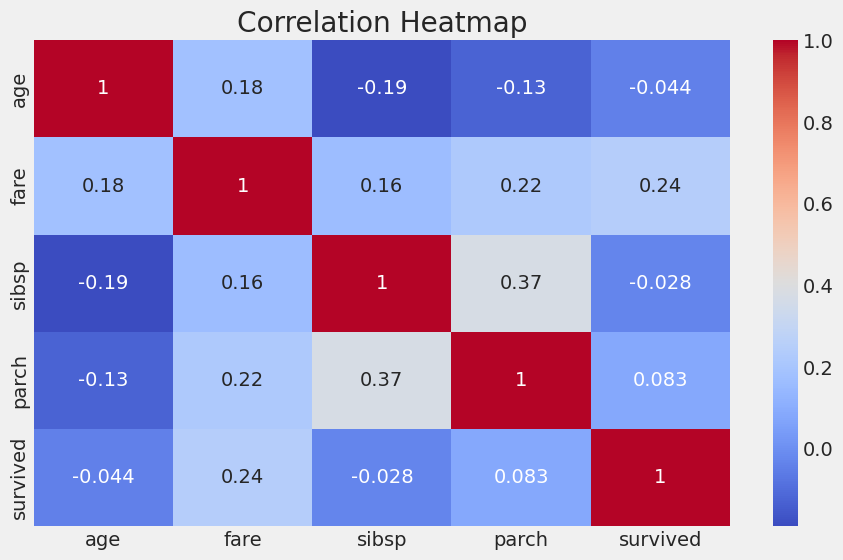

In [32]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['age', 'fare', 'sibsp', 'parch', 'survived']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()

In [33]:
# Document insights
survival_by_sex = df.groupby('sex')['survived'].mean()
survival_by_class = df.groupby('pclass')['survived'].mean()

print(f"\nFemales survival rate: {survival_by_sex[1]:.2f}")
print(f"Males survival rate: {survival_by_sex[0]:.2f}")
print(f"First class survival rate: {survival_by_class[1]:.2f}")
print(f"Second class survival rate: {survival_by_class[2]:.2f}")
print(f"Third class survival rate: {survival_by_class[3]:.2f}")



Females survival rate: 0.19
Males survival rate: 0.73
First class survival rate: 0.62
Second class survival rate: 0.43
Third class survival rate: 0.26


/tmp/ipython-input-346385771.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\nFemales survival rate: {survival_by_sex[1]:.2f}")
/tmp/ipython-input-346385771.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Males survival rate: {survival_by_sex[0]:.2f}")
